<a href="https://colab.research.google.com/github/alicianingchen/airbnbNY/blob/main/airbnb_EDA_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import preprocessing, metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
import statsmodels.api as sm
from scipy import stats


url = 'https://github.com/alicianingchen/airbnbNY/blob/main/AB_NYC_2019.csv?raw=true'
dataset_raw = pd.read_csv(url)
print(dataset_raw.shape)
dataset_raw.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
# Find out how many null value in the data
dataset = dataset_raw.copy()
print(dataset.columns)
print(dataset.isnull().sum())

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [3]:
# Fill na value 
dataset.fillna({'reviews_per_month':0}, inplace=True)
dataset.fillna({'name':"NoName"}, inplace=True)
dataset.fillna({'host_name':"NoName"}, inplace=True)
dataset.fillna({'last_review':"NotReviewed"}, inplace=True)
dataset.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [4]:
# Observe price stats
dataset["price"].describe()
# We see that the average price is 152. Price varies between 0 to 10000, 75% smaller than 175

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

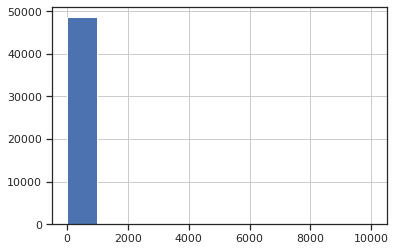

In [5]:
# See the distribution of price
hist_price=dataset["price"].hist()
# Observe that most listings have price less than $1000

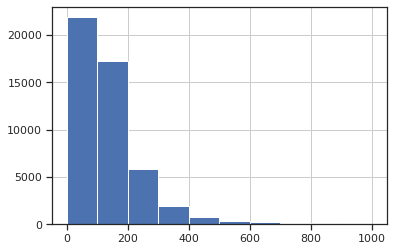

In [6]:
# Plot histogram for prices less than $1000
hist_price1=dataset["price"][dataset["price"]<1000].hist()
# This gives a clearer picture!

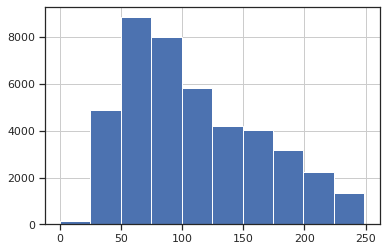

In [7]:
dataset=dataset[dataset["price"]<1000]
# We can see a more Gaussian distribution below
hist_price2=dataset["price"][dataset["price"]<250].hist()
# We use 250 as threshold price 
dataset=dataset[dataset["price"]<250]

In [8]:
# Looking at the price column again
dataset["price"].describe()

count    42669.000000
mean       107.897748
std         53.803457
min          0.000000
25%         65.000000
50%         99.000000
75%        150.000000
max        249.000000
Name: price, dtype: float64

In [9]:
dataset = dataset.drop(columns = ["id","host_name"])
# Try to find out more relation for name and price
dataset["name_length"]=dataset['name'].map(str).apply(len)
# Max and Min name length
print(dataset["name_length"].max())
print(dataset["name_length"].min())
# See the corelaton of name_length and price
print("corr:",dataset["name_length"].corr(dataset["price"]))
# Doesnot seem a lot of inpact here

179
1
corr: 0.05629573141120946


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


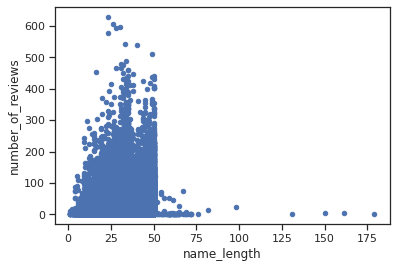

In [10]:
# Let's figure if name length has an impact on how much it is written a review. 
dataset.plot.scatter(x="name_length", y ="number_of_reviews" )
# From the plot, there's not significant relationship.

count    42669.000000
mean         6.856359
std         19.981924
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64


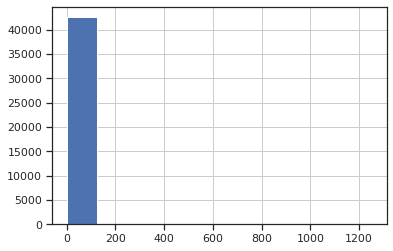

In [11]:
# See minimun nights distribution
dataset["minimum_nights"].hist()
print(dataset["minimum_nights"].describe())
# 75%  data is smaler than 5, we dont need 1250 this large distribution, we'll get a threshold  

0.059554361719124344

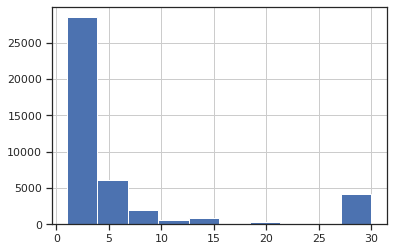

In [12]:
dataset.loc[(dataset.minimum_nights >30),"minimum_nights"]=30
dataset["minimum_nights"].hist()
dataset["minimum_nights"].corr(dataset["price"])

In [13]:
dataset.drop(["host_id","name",'last_review',"latitude",'longitude'], axis=1, inplace=True)
dataset.dtypes

neighbourhood_group                object
neighbourhood                      object
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
name_length                         int64
dtype: object

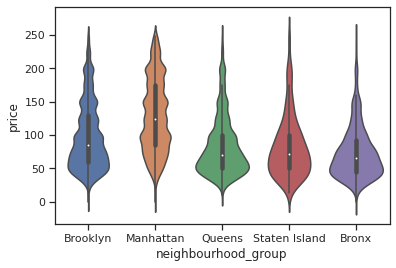

In [14]:
sns.violinplot( x=dataset["neighbourhood_group"], y=dataset["price"])
# From violin plot it's quite obvious that manhattan is most expensive and almost evenly distributed.

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'name_length'],
      dtype='object')

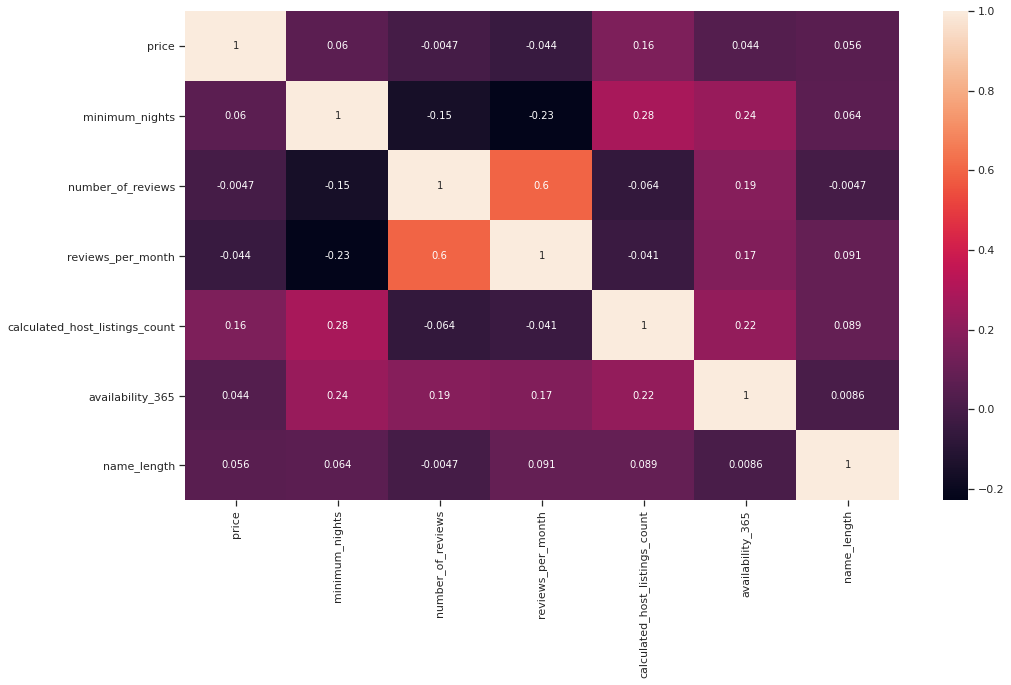

In [15]:
# Plot correlation matrix here to see impact of each feature
corr = dataset.corr(method='pearson')
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)
dataset.columns
# No obvious feature corelation appears

In [16]:
# Categorical encoding neighbourhood_group, room_type column
dataset_onehot1 = pd.get_dummies(dataset, columns=['neighbourhood_group',"room_type"], prefix = ['ng',"rt"],drop_first=True)
dataset_onehot1.drop(["neighbourhood"], axis=1, inplace=True)
dataset_onehot1.shape

(42669, 13)

In [17]:
# Train, test dataset splitting
X1= dataset_onehot1.loc[:, dataset_onehot1.columns != 'price']
Y1 = dataset_onehot1["price"]
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.20, random_state=42)

In [18]:
# Fitting Linear regression
reg1 = LinearRegression().fit(x_train1, y_train1)
# R squared value
reg1.score(x_train1, y_train1)

0.5033306680968379

In [19]:
# See Coefficient of every feature to decide which feature can be dropped
Coeff1 = pd.DataFrame(columns=["Variable","Coefficient"])
Coeff1["Variable"]=x_train1.columns
Coeff1["Coefficient"]=reg1.coef_
Coeff1.sort_values("Coefficient")

,Variable,Coefficient
11,rt_Shared room,-89.090227
10,rt_Private room,-65.644241
2,reviews_per_month,-1.616417
0,minimum_nights,-0.809520
1,number_of_reviews,-0.009088
4,availability_365,0.046786
3,calculated_host_listings_count,0.142435
5,name_length,0.198697
9,ng_Staten Island,0.205908
8,ng_Queens,9.690562


In [20]:
# Calculate RMSE
y_pred1 = reg1.predict(x_test1)
rmse1 = np.sqrt(metrics.mean_squared_error(y_test1, y_pred1))
rmse1

37.68798547656789

In [21]:
# We can see from coefficient dataframe that number_of_reviews and availability_365 has low impact we can drop them.
# R-squared value from training model is low, since its a basic linear regression model, we can definitely try on other more complex model  as random forest regressor model as I did  in this repo's ml_script.py.